In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as K
import tensorflow as tf
from src.models.train_model import train_resnet
from src.models.detectors import Detector
from tqdm import tqdm
from copy import deepcopy
from src.data.dataset_loaders import DatasetLoader, DOTADatasetLoader, AerialCarsDatasetLoader
from typing import Tuple
from src.features.pipelines import RawImageToImage
from src.features.processors import NormImage, Resize
from src.data.image_loaders import DOTASquareImageLoader, AerialCarsSquareImageLoader
from src.models.classifiers import ResnetModelWrapper
from src.models.detectors import SliderProbDetector
from src.data.sliders import SlidingWindow
import matplotlib.pyplot as plt
from src.data.make_dataset import make_dataset
from src.features.descriptors import LBPDescriptor

## DOTA

In [2]:
EPOCHS=2

In [3]:
with open('../../data/processed/dota/data1_2.pickle', 'rb') as f:
    data = pickle.load(f)
# model, history = train_resnet(data, epochs=EPOCHS)

In [4]:
len(data)

40146

In [5]:
pos_images = [d[0] for d in data if d[2] == 1]

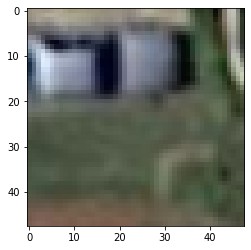

In [14]:
plt.imshow(pos_images[120])

In [4]:
with open('../../data/processed/dota/data2_2.pickle', 'rb') as f:
    data = data + pickle.load(f)
#     data = pickle.load(f)
# model, history = train_resnet(data, epochs=EPOCHS, pretrained_model=model)

EOFError: Ran out of input

In [5]:
with open('../../data/processed/dota/data3.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [15]:
model, history = train_resnet(data, epochs=EPOCHS, batch_size=1000, lr=0.001)

In [7]:
with open('../../data/processed/dota/data4.pickle', 'rb') as f:
    # data = data + pickle.load(f)
    data = pickle.load(f)

In [8]:
with open('../../data/processed/dota/data5.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [9]:
with open('../../data/processed/dota/data6.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [10]:
model, history = train_resnet(data, epochs=EPOCHS, batch_size=1000, lr=0.001, pretrained_model=model)

Epoch 1/2
14/14 [==============================] - 159s 11s/step - loss: 0.4738 - accuracy: 0.7527 - val_loss: 0.4221 - val_accuracy: 0.7601
Epoch 2/2
14/14 [==============================] - 160s 11s/step - loss: 0.3417 - accuracy: 0.8600 - val_loss: 0.3159 - val_accuracy: 0.8940


### ResNet training

In [11]:
# model, history = train_resnet(data, epochs=3, batch_size=1000, lr=0.001)

### Validation

In [ ]:
data = None

In [ ]:
def validate_model(
    dataset_loader: DatasetLoader,
    input_folder_filepath: str,
    images_files_types: Tuple[str],
    annotations_files_types: Tuple[str],
    detector: Detector,
    workers: int = 0
):

    images = dataset_loader.load_dataset(
        input_folder_filepath,
        images_files_types,
        annotations_files_types,
        False
    )

    processed_images = []

    for image in tqdm(images):
        processed_images.append(
            detector(deepcopy(image), workers, False)
        )

    return processed_images

In [ ]:
class LBPWrapper:
    def __init__(self, lbp):
        self.lbl = slf.lbp

    def process(self, image):
        return self.lbl.process(image)[1]



In [ ]:
dataset_loader = DOTADatasetLoader(
    image_loader=DOTASquareImageLoader()
)

process_pipeline=RawImageToImage(
    processors=[
        Resize((100, 100)),
        # LBPWrapper(LBPDescriptor(
        #     bins = 256,
        #     range = (0, 256)
        # )),
        NormImage()
    ]
)

sliding_window = SlidingWindow(
    step_size=25,
    window_size=(50, 50)
)

slider_detector = NNSliderDetector(
    sliding_window=sliding_window,
    process_pipeline=process_pipeline,
    classifier=ResnetModelWrapper(model),
    treshold=0.95,
    nms_overlap=0.4
)

In [ ]:
processed_images = validate_model(
    dataset_loader=dataset_loader,
    input_folder_filepath='../../data/raw/dota/val_dev',
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    detector=slider_detector
)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[0][0])

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[1][0])

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[2][0])

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[3][0])

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[4][0])